## **23CO315 Piyusha Supe**
Practical 7 - Text Analytics
1. Extract Sample document and apply following document preprocessing methods:
Tokenization, POS Tagging, stop words removal, Stemming and Lemmatization.
2. Create representation of document by calculating Term Frequency and Inverse Document
Frequency

In [5]:
import nltk
import re
import pandas as pd
from nltk.tokenize import word_tokenize, sent_tokenize
from nltk.corpus import stopwords
from nltk.stem import PorterStemmer, WordNetLemmatizer
from sklearn.feature_extraction.text import TfidfVectorizer

# Download necessary resources
nltk.download('punkt')
nltk.download('stopwords')
nltk.download('wordnet')
nltk.download('averaged_perceptron_tagger_eng')


[nltk_data] Downloading package punkt to /root/nltk_data...
[nltk_data]   Package punkt is already up-to-date!
[nltk_data] Downloading package stopwords to /root/nltk_data...
[nltk_data]   Package stopwords is already up-to-date!
[nltk_data] Downloading package wordnet to /root/nltk_data...
[nltk_data]   Package wordnet is already up-to-date!
[nltk_data] Downloading package averaged_perceptron_tagger_eng to
[nltk_data]     /root/nltk_data...
[nltk_data]   Unzipping taggers/averaged_perceptron_tagger_eng.zip.


True

In [6]:
# Sample text about whales (50 words)
text1 = """Whales are the largest marine mammals. They belong to the cetacean family,
which includes dolphins and porpoises. Blue whales are the biggest, reaching up to
100 feet in length. They communicate using low-frequency sounds. Whales migrate long
distances for breeding and feeding. Their conservation is crucial for marine biodiversity."""

# Sample text about goldfish (50 words)
text2 = """Goldfish are small freshwater fish commonly kept as pets. They originate from East Asia
and belong to the carp family. Goldfish can recognize their owners and learn feeding schedules.
They require clean water and proper nutrition to thrive. Some varieties grow up to a foot in size."""

documents = [text1, text2]


In [7]:
nltk.download("punkt_tab")
# Initialize tools
stop_words = set(stopwords.words("english"))
ps = PorterStemmer()
lemmatizer = WordNetLemmatizer()

# Function for text preprocessing
def preprocess_text(text):
    # Convert to lowercase
    text = text.lower()

    # Remove punctuation
    text = re.sub(r'[^a-z\s]', '', text)

    # Remove all punctuation
    cleaned_text = re.sub(f"[{re.escape(string.punctuation)}]", "", text)

    # Tokenization
    tokens = word_tokenize(text)

    # Remove stop words
    filtered_tokens = [word for word in tokens if word not in stop_words]

    # Perform POS tagging
    pos_tags = nltk.pos_tag(filtered_tokens)

    # Perform stemming
    stemmed_words = [ps.stem(word) for word in filtered_tokens]

    # Perform lemmatization
    lemmatized_words = [lemmatizer.lemmatize(word) for word in filtered_tokens]

    return {
        "tokens": tokens,
        "filtered_tokens": filtered_tokens,
        "pos_tags": pos_tags,
        "stemmed_words": stemmed_words,
        "lemmatized_words": lemmatized_words
    }

# Apply preprocessing
processed_text1 = preprocess_text(text1)
processed_text2 = preprocess_text(text2)


[nltk_data] Downloading package punkt_tab to /root/nltk_data...
[nltk_data]   Package punkt_tab is already up-to-date!


In [8]:
print("\nPreprocessed Results for Text 1 (Whales):")
print("Tokens:", processed_text1["tokens"])
print("Filtered Tokens (Stopwords & Punctuation Removed):", processed_text1["filtered_tokens"])
print("POS Tags:", processed_text1["pos_tags"])
print("Stemmed Words:", processed_text1["stemmed_words"])
print("Lemmatized Words:", processed_text1["lemmatized_words"])

print("\nPreprocessed Results for Text 2 (Goldfish):")
print("Tokens:", processed_text2["tokens"])
print("Filtered Tokens (Stopwords & Punctuation Removed):", processed_text2["filtered_tokens"])
print("POS Tags:", processed_text2["pos_tags"])
print("Stemmed Words:", processed_text2["stemmed_words"])
print("Lemmatized Words:", processed_text2["lemmatized_words"])



Preprocessed Results for Text 1 (Whales):
Tokens: ['whales', 'are', 'the', 'largest', 'marine', 'mammals', 'they', 'belong', 'to', 'the', 'cetacean', 'family', 'which', 'includes', 'dolphins', 'and', 'porpoises', 'blue', 'whales', 'are', 'the', 'biggest', 'reaching', 'up', 'to', 'feet', 'in', 'length', 'they', 'communicate', 'using', 'lowfrequency', 'sounds', 'whales', 'migrate', 'long', 'distances', 'for', 'breeding', 'and', 'feeding', 'their', 'conservation', 'is', 'crucial', 'for', 'marine', 'biodiversity']
Filtered Tokens (Stopwords & Punctuation Removed): ['whales', 'largest', 'marine', 'mammals', 'belong', 'cetacean', 'family', 'includes', 'dolphins', 'porpoises', 'blue', 'whales', 'biggest', 'reaching', 'feet', 'length', 'communicate', 'using', 'lowfrequency', 'sounds', 'whales', 'migrate', 'long', 'distances', 'breeding', 'feeding', 'conservation', 'crucial', 'marine', 'biodiversity']
POS Tags: [('whales', 'NNS'), ('largest', 'JJS'), ('marine', 'NN'), ('mammals', 'NNS'), ('bel

In [11]:
# Split documents into word lists (after removing punctuation and lowering case)
def clean_and_tokenize(doc):
    doc = doc.lower()
    doc = re.sub(r'[^a-z\s]', '', doc)
    return doc.split()

bagOfWords1 = clean_and_tokenize(text1)
bagOfWords2 = clean_and_tokenize(text2)

# Get the unique set of all words in both documents
uniqueWords = set(bagOfWords1).union(set(bagOfWords2))


In [12]:
# Initialize word count dictionaries
numOfWords1 = dict.fromkeys(uniqueWords, 0)
numOfWords2 = dict.fromkeys(uniqueWords, 0)

for word in bagOfWords1:
    numOfWords1[word] += 1

for word in bagOfWords2:
    numOfWords2[word] += 1


In [13]:
def computeTF(wordDict, bagOfWords):
    tfDict = {}
    totalWords = len(bagOfWords)
    for word, count in wordDict.items():
        tfDict[word] = count / totalWords
    return tfDict

tf1 = computeTF(numOfWords1, bagOfWords1)
tf2 = computeTF(numOfWords2, bagOfWords2)


In [14]:
import math

def computeIDF(docList):
    N = len(docList)
    idfDict = dict.fromkeys(docList[0].keys(), 0)
    for doc in docList:
        for word, val in doc.items():
            if val > 0:
                idfDict[word] += 1
    for word, val in idfDict.items():
        idfDict[word] = math.log(N / float(val))
    return idfDict

idfs = computeIDF([numOfWords1, numOfWords2])


In [15]:
def computeTFIDF(tf, idf):
    tfidf = {}
    for word, val in tf.items():
        tfidf[word] = val * idf[word]
    return tfidf

tfidf1 = computeTFIDF(tf1, idfs)
tfidf2 = computeTFIDF(tf2, idfs)


In [16]:
import pandas as pd

df = pd.DataFrame([tfidf1, tfidf2])
df.index = ['Document 1 - Whales', 'Document 2 - Goldfish']

print("\nTF-IDF Representation:")
print(df)



TF-IDF Representation:
                       feeding    whales      from      some  reaching  \
Document 1 - Whales        0.0  0.043322  0.000000  0.000000  0.014441   
Document 2 - Goldfish      0.0  0.000000  0.014748  0.014748  0.000000   

                       varieties  dolphins  recognize     small       can  \
Document 1 - Whales     0.000000  0.014441   0.000000  0.000000  0.000000   
Document 2 - Goldfish   0.014748  0.000000   0.014748  0.014748  0.014748   

                       ...  originate  freshwater  biodiversity  and  \
Document 1 - Whales    ...   0.000000    0.000000      0.014441  0.0   
Document 2 - Goldfish  ...   0.014748    0.014748      0.000000  0.0   

                           size       for      east     using  are   to  
Document 1 - Whales    0.000000  0.028881  0.000000  0.014441  0.0  0.0  
Document 2 - Goldfish  0.014748  0.000000  0.014748  0.000000  0.0  0.0  

[2 rows x 68 columns]


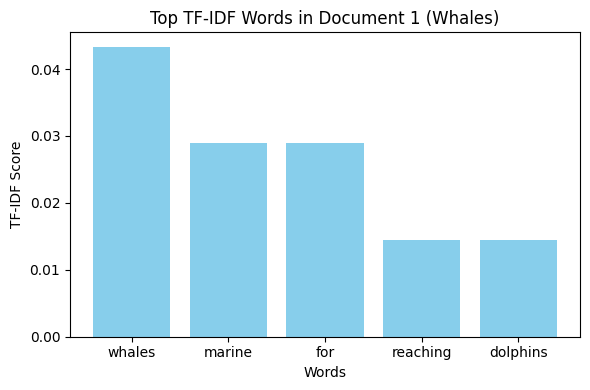

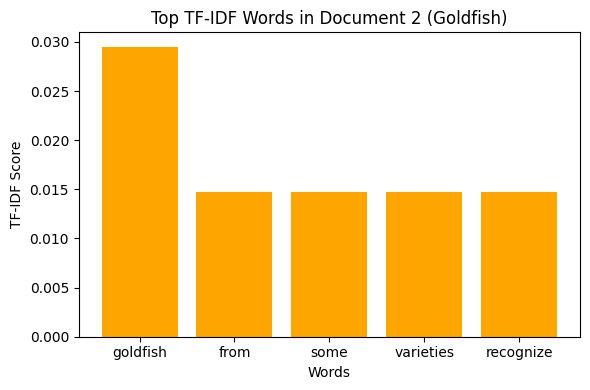

In [17]:
import matplotlib.pyplot as plt

# Get top 5 TF-IDF words from each document
top_words_doc1 = dict(sorted(tfidf1.items(), key=lambda item: item[1], reverse=True)[:5])
top_words_doc2 = dict(sorted(tfidf2.items(), key=lambda item: item[1], reverse=True)[:5])

# Plot for Document 1
plt.figure(figsize=(6, 4))
plt.bar(top_words_doc1.keys(), top_words_doc1.values(), color='skyblue')
plt.title("Top TF-IDF Words in Document 1 (Whales)")
plt.xlabel("Words")
plt.ylabel("TF-IDF Score")
plt.tight_layout()
plt.show()

# Plot for Document 2
plt.figure(figsize=(6, 4))
plt.bar(top_words_doc2.keys(), top_words_doc2.values(), color='orange')
plt.title("Top TF-IDF Words in Document 2 (Goldfish)")
plt.xlabel("Words")
plt.ylabel("TF-IDF Score")
plt.tight_layout()
plt.show()
